In [1]:
%matplotlib inline
import os
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
import pandas as pd
import geopandas as gpd

from bokeh.io import output_file, show, output_notebook, export_png
from bokeh.models import ColumnDataSource, GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.plotting import figure
from bokeh.palettes import brewer

In [2]:
notebook_path = os.path.abspath("Notebook.ipynb")
project_path = Path(notebook_path).parent.parent

data_path = os.path.join(project_path, 'data')
external_data_path = os.path.join(data_path, 'external', '')
processed_data_path = os.path.join(data_path, 'processed', '')

---

# Maps

In [3]:
datafile = os.path.join(processed_data_path, 'covid_countries.csv')
shapefile = os.path.join(external_data_path, 'ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

In [67]:
colors = 9
cmap = ''
figsize = (16, 10)
start = '2020-01-22'
end = '2020-04-27'
confirmed = 'confirmed'
death = 'death'

plot_date = end
case_type = confirmed
if case_type == 'confirmed':
    cmap = 'Blues'
else:
    cmap = 'Reds'
title = 'Cumulative COVID-19 {} Cases (per 100K) by {}'.format(case_type.capitalize(), plot_date)
description = '''
Individuals who have used the Internet from any location in the last 3 months via any device based on the International Telecommunication Union,
World Telecommunication/ICT Development Report and database. Data: World Bank - worldbank.org • Author: Ramiro Gómez - ramiro.org'''.strip()

In [68]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.sample(5)

,ADM0_A3,geometry
96,CIV,"MULTIPOLYGON (((-751263.419 1086844.375, -7495..."
55,FIN,"MULTIPOLYGON (((1988201.565 7188019.863, 19808..."
107,BWA,"POLYGON ((2352653.713 -1903111.293, 2348562.58..."
132,UGA,"POLYGON ((2878654.825 -114100.222, 2877621.093..."
50,DEU,"MULTIPOLYGON (((1142439.172 5198976.864, 11402..."


In [69]:
df = pd.read_csv(datafile)#[['DisplayName','ISO3Code', 'Continent', 'Date',
       #'CaseType', 'CumulativeReportedCases', 'CumulativeReportedCasesPer100K']]
df.sample(5)

,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
14783,Norway,Norway,60.4720,8.4689,NO,NOR,578,5337960.0,Europe,2020-04-26,confirmed,28,7527,0.524545,141.008925,1.003734,1.008825,78.888164
18494,Sri Lanka,Sri Lanka,7.0000,81.0000,LK,LKA,144,21228760.0,Asia,2020-02-23,confirmed,0,1,0.000000,0.004711,1.000000,1.000000,inf
31512,Israel,Israel,31.0000,35.0000,IL,ISR,376,8381507.0,Asia,2020-04-27,death,3,204,0.035793,2.433930,1.014925,1.020489,34.176385
2787,Brazil,Brazil,-14.2350,-51.9253,BR,BRA,76,209469320.0,South America,2020-02-24,confirmed,0,0,0.000000,0.000000,0.000000,0.000000,-0.000000
15926,Romania,Romania,45.9432,24.9668,RO,ROU,642,19506110.0,Europe,2020-02-05,confirmed,0,0,0.000000,0.000000,0.000000,0.000000,-0.000000


In [70]:
# Select case type
df = df[df['CaseType'] == case_type]

# Select date
df = df[df['Date'] == plot_date]

In [71]:
merged = gdf.merge(df, left_on='ADM0_A3', right_on='ISO3Code')
merged.describe()

,Latitude,Longitude,ISONumCode,TotalPopulation,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
count,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,27.356478,30.640355,425.129353,3.764134e+07,341.646766,15027.835821,1.073974,84.142370,1.014163,1.024659,inf
std,91.850170,288.366626,252.941699,1.434009e+08,1726.437879,75697.190919,2.993607,182.917413,0.109946,0.109028,NaN
min,-255.969500,-1114.963400,4.000000,8.100000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
25%,6.428100,-19.020800,208.000000,1.189262e+06,0.000000,73.000000,0.000000,3.072846,1.000000,1.006965,14.175360
50%,18.420700,16.000000,422.000000,7.650149e+06,6.000000,538.000000,0.115404,15.475215,1.007650,1.023595,28.558315
75%,41.204400,43.356900,652.000000,2.626231e+07,84.000000,4695.000000,0.893413,85.014536,1.032322,1.049241,94.177871
max,1083.336700,3684.419700,894.000000,1.427648e+09,22412.000000,988197.000000,34.403645,1592.469808,1.377358,1.184700,inf


In [72]:
merged.head()

,ADM0_A3,geometry,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
0,IDN,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Indonesia,Indonesia,-0.7893,113.9213,ID,IDN,360,267670549.0,Asia,2020-04-27,confirmed,214,9096,0.079949,3.398207,1.024094,1.043313,16.347157
1,MYS,"MULTIPOLYGON (((11108970.260 445285.130, 11108...",Malaysia,Malaysia,2.5000,112.5000,MY,MYS,458,31528033.0,Asia,2020-04-27,confirmed,40,5820,0.126871,18.459762,1.006920,1.010091,69.036243
2,CHL,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Chile,Chile,-35.6751,-71.5430,CL,CHL,152,18729166.0,South America,2020-04-27,confirmed,482,13813,2.573526,73.751282,1.036156,1.039855,17.736072
3,BOL,"POLYGON ((-6477059.899 -1872360.838, -6477072....","Bolivia, Plurinational State of",Bolivia,-16.2902,-63.5887,BO,BOL,68,11353140.0,South America,2020-04-27,confirmed,64,1014,0.563721,8.931450,1.067368,1.087412,8.271391
4,PER,"MULTIPOLYGON (((-6477059.899 -1872360.838, -64...",Peru,Peru,-9.1900,-75.0152,PE,PER,604,31989265.0,South America,2020-04-27,confirmed,1182,28699,3.694990,89.714471,1.042955,1.083932,8.600381


In [73]:
merged.describe()

,Latitude,Longitude,ISONumCode,TotalPopulation,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
count,201.000000,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,27.356478,30.640355,425.129353,3.764134e+07,341.646766,15027.835821,1.073974,84.142370,1.014163,1.024659,inf
std,91.850170,288.366626,252.941699,1.434009e+08,1726.437879,75697.190919,2.993607,182.917413,0.109946,0.109028,NaN
min,-255.969500,-1114.963400,4.000000,8.100000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000
25%,6.428100,-19.020800,208.000000,1.189262e+06,0.000000,73.000000,0.000000,3.072846,1.000000,1.006965,14.175360
50%,18.420700,16.000000,422.000000,7.650149e+06,6.000000,538.000000,0.115404,15.475215,1.007650,1.023595,28.558315
75%,41.204400,43.356900,652.000000,2.626231e+07,84.000000,4695.000000,0.893413,85.014536,1.032322,1.049241,94.177871
max,1083.336700,3684.419700,894.000000,1.427648e+09,22412.000000,988197.000000,34.403645,1592.469808,1.377358,1.184700,inf


In [74]:
# 
merged[merged['CumulativeReportedCasesPer100K'] > merged['CumulativeReportedCases']]

,ADM0_A3,geometry,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
32,MAF,"POLYGON ((-5867060.676 1928703.154, -5873179.4...",Saint Martin (French part),St Martin,18.070800,-63.050100,MF,MAF,663,37264.0,North America,2020-04-27,confirmed,0,38,0.000000,101.975097,1.000000,1.003817,181.940352
33,SXM,"POLYGON ((-5875110.733 1931775.698, -5873179.4...",Sint Maarten (Dutch part),Sint Maarten,18.042500,-63.054800,SX,SXM,534,41936.0,North America,2020-04-27,confirmed,0,74,0.000000,176.459367,1.000000,1.014297,48.826703
88,LIE,"POLYGON ((795037.289 5042278.553, 795842.797 5...",Liechtenstein,Liechtenstein,47.140000,9.550000,LI,LIE,438,37918.0,Europe,2020-04-27,confirmed,0,82,0.000000,216.256132,1.000000,1.001754,395.435505
104,SMR,"POLYGON ((1059325.651 4688410.446, 1056711.051...",San Marino,San Marino,43.942400,12.457800,SM,SMR,674,33784.0,Europe,2020-04-27,confirmed,0,538,0.000000,1592.469808,1.000000,1.021995,31.859698
113,MCO,"POLYGON ((634422.574 4672729.600, 634042.379 4...",Monaco,Monaco,43.733300,7.416700,MC,MCO,492,38682.0,Europe,2020-04-27,confirmed,1,95,2.585182,245.592265,1.010638,1.001513,458.512581
121,AND,"POLYGON ((146647.391 4541698.444, 145837.345 4...",Andorra,Andorra,42.506300,1.521800,AD,AND,20,77008.0,Europe,2020-04-27,confirmed,5,743,6.492832,964.834822,1.006775,1.005102,136.215678
142,GIB,"POLYGON ((-474979.425 3865208.499, -473240.840...",Gibraltar,Gibraltar,36.140800,-5.353600,GI,GIB,292,33715.0,Europe,2020-04-27,confirmed,0,141,0.000000,418.211479,1.000000,1.009467,73.562458
155,VAT,"POLYGON ((1073415.331 4478198.523, 1073377.322...",Holy See,Holy See,41.902900,12.453400,VA,VAT,336,810.0,Europe,2020-04-27,confirmed,0,9,0.000000,1111.111111,1.000000,1.000000,inf
157,GRL,"MULTIPOLYGON (((-2930846.058 6825537.453, -293...",Greenland,Greenland,71.706900,-42.604300,GL,GRL,304,56565.0,North America,2020-04-27,confirmed,0,11,0.000000,19.446654,1.000000,1.000000,inf
167,TCA,"MULTIPOLYGON (((-6704176.166 2321436.782, -670...",Turks and Caicos Islands,Turks and Caicos Islands,21.694000,-71.797900,TC,TCA,796,37667.0,North America,2020-04-27,confirmed,1,12,2.654844,31.858125,1.090909,1.012508,55.763171


In [75]:
limited_merged = merged[merged['CumulativeReportedCasesPer100K'] < merged['CumulativeReportedCases']]

In [76]:
limited_merged.describe()

,Latitude,Longitude,ISONumCode,TotalPopulation,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
count,175.000000,175.000000,175.000000,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,27.470172,39.446029,424.605714,4.317106e+07,392.360000,17246.120000,1.157386,58.115445,1.027024,1.038741,inf
std,98.015326,307.725685,252.325253,1.529652e+08,1845.526017,80919.816313,3.154387,106.000715,0.042993,0.036618,NaN
min,-255.969500,-1114.963400,4.000000,1.058460e+05,0.000000,1.000000,0.000000,0.003509,1.000000,1.000000,4.089610
25%,4.785450,-7.392350,206.000000,2.943297e+06,0.000000,104.500000,0.000000,2.087995,1.000000,1.010707,12.990783
50%,17.607800,20.168300,418.000000,9.965322e+06,13.000000,822.000000,0.185652,11.024702,1.011987,1.030769,22.872054
75%,40.106100,46.534350,638.000000,3.116891e+07,129.000000,6157.000000,1.024496,60.525323,1.038462,1.054806,65.107733
max,1083.336700,3684.419700,894.000000,1.427648e+09,22412.000000,988197.000000,34.403645,617.134800,1.377358,1.184700,inf


In [77]:
limited_merged.sort_values(by='CumulativeReportedCasesPer100K', ascending=False)

,ADM0_A3,geometry,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
52,LUX,"POLYGON ((501187.069 5339353.679, 500670.870 5...",Luxembourg,Luxembourg,49.815300,6.129600,LU,LUX,442,604244.0,Europe,2020-04-27,confirmed,6,3729,0.992976,617.134800,1.001612,1.006728,103.363315
171,ISL,"MULTIPOLYGON (((-1029979.730 6945918.439, -103...",Iceland,Iceland,64.963100,-19.020800,IS,ISL,352,336712.0,Europe,2020-04-27,confirmed,0,1792,0.000000,532.205564,1.000000,1.001524,455.192740
60,ESP,"MULTIPOLYGON (((-474001.930 3833840.165, -4759...",Spain,Spain,40.000000,-4.000000,ES,ESP,724,46692863.0,Europe,2020-04-27,confirmed,1831,209465,3.921370,448.601749,1.008818,1.006477,107.369924
71,IRL,"MULTIPOLYGON (((-571378.821 5845369.471, -5729...",Ireland,Ireland,53.142400,-7.692100,IE,IRL,372,4818694.0,Europe,2020-04-27,confirmed,386,19648,8.010469,407.745335,1.020039,1.033016,21.339157
54,BEL,"POLYGON ((205168.682 5439147.958, 206798.165 5...",Belgium,Belgium,50.833300,4.000000,BE,BEL,56,11482180.0,Europe,2020-04-27,confirmed,553,46687,4.816159,406.603972,1.011987,1.022391,31.301121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,ETH,"POLYGON ((3205502.086 1011186.869, 3204950.111...",Ethiopia,Ethiopia,9.145000,40.489700,ET,ETH,231,109224410.0,Africa,2020-04-27,confirmed,1,124,0.000916,0.113528,1.008130,1.015947,43.810117
117,BDI,"POLYGON ((2885636.262 -256751.717, 2882472.864...",Burundi,Burundi,-3.373100,29.918900,BI,BDI,108,11175379.0,Africa,2020-04-27,confirmed,0,11,0.000000,0.098431,1.000000,1.119225,6.153827
149,PNG,"MULTIPOLYGON (((13313106.713 -278130.435, 1331...",Papua New Guinea,Papua New Guinea,-6.315000,143.955500,PG,PNG,598,8606324.0,Oceania,2020-04-27,confirmed,0,8,0.000000,0.092955,1.000000,1.019259,36.336251
95,AGO,"MULTIPOLYGON (((1233646.002 -495756.646, 12328...",Angola,Angola,-11.202700,17.873900,AO,AGO,24,30809787.0,Africa,2020-04-27,confirmed,1,27,0.003246,0.087634,1.038462,1.016969,41.194644


In [78]:
limited_merged[limited_merged['CumulativeReportedCasesPer100K'] > 600]

,ADM0_A3,geometry,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
52,LUX,"POLYGON ((501187.069 5339353.679, 500670.870 5...",Luxembourg,Luxembourg,49.8153,6.1296,LU,LUX,442,604244.0,Europe,2020-04-27,confirmed,6,3729,0.992976,617.1348,1.001612,1.006728,103.363315


In [79]:
# set range for the choropleth values
vmin, vmax = limited_merged['CumulativeReportedCasesPer100K'].min(), limited_merged['CumulativeReportedCasesPer100K'].max()

/Users/reginagalambos/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


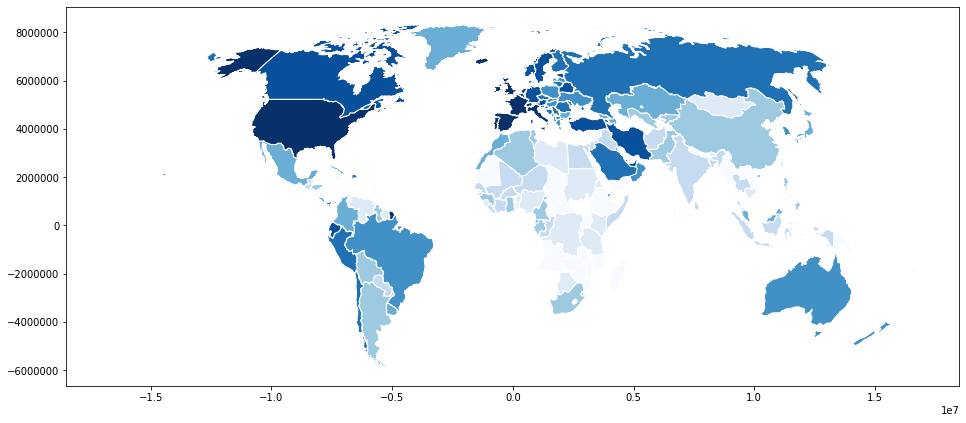

In [80]:
# Mapping the data
fig, ax = plt.subplots(1,1, figsize=figsize)

ax = merged.dropna().plot(column='CumulativeReportedCasesPer100K', categorical=True, cmap=cmap, scheme='QUANTILES', 
                          edgecolor='white',
                          k=colors,
                         legend=False,
                          ax=ax,
                          missing_kwds={'color': 'lightgrey'}
                         )

/Users/reginagalambos/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:335: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


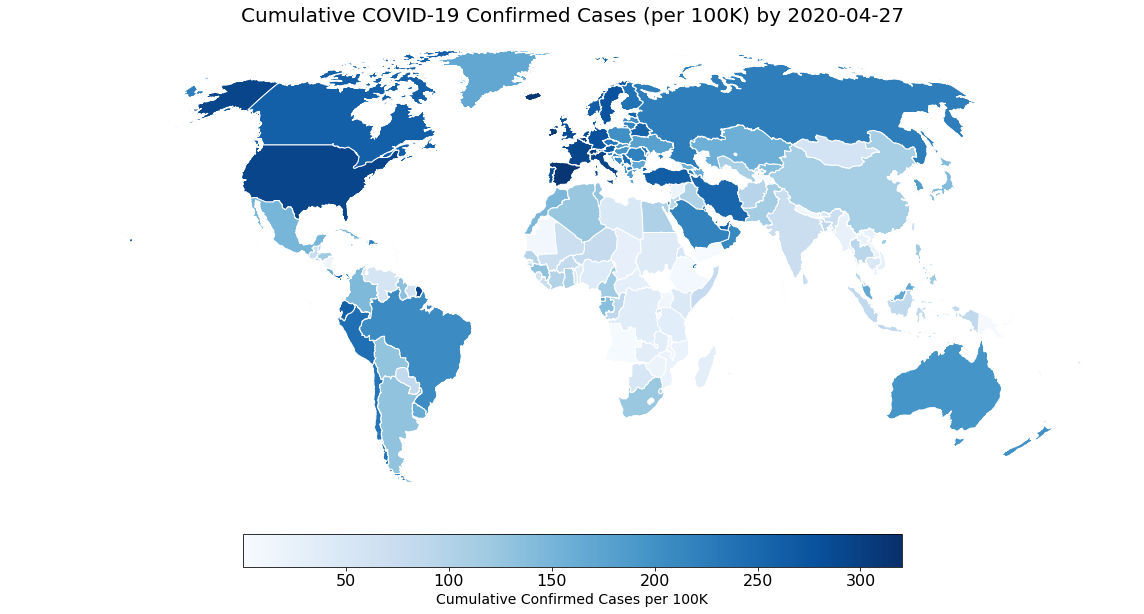

In [81]:
#merged[merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')
# Mapping the data
# Mapping the data
fig, ax = plt.subplots(1,1, figsize=figsize)

ax = merged.dropna().plot(column='CumulativeReportedCasesPer100K', categorical=True, cmap=cmap, 
                          edgecolor='white',
                          k=colors,
                         legend=False,
                          ax=ax,
                          missing_kwds={'color': 'lightgrey'},
                          rasterized=True
                         )
#ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

#cax = fig.add_axes([0.15, 0, 0.75, 0.035])
# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=320))
#sm.set_array([])
cbr = fig.colorbar(sm, orientation='horizontal', fraction=0.05, pad=0.04)#)#, pad=0.2, aspect=30)
cbr.ax.tick_params(labelsize=16) 
cbr.set_label('Cumulative {} Cases per 100K'.format(case_type.capitalize()), fontsize=14)
#cbr.ax.tick_params(size=0)
#cbr.set_ticks([merged['CumulativeReportedCasesPer100K'].min(), merged['CumulativeReportedCasesPer100K'].max()])
#cbr.set_ticklabels(['< 1', '> 120'])
#cbr.ax.set_xticklabels(['< 1', '' , '', '', '',  '', '', '>100'])
ax.set_axis_off()
#ax.set_xlim([-1.5e7, 1.7e7])
#ax.set_ylim(0,2e5)
#ax.get_legend().set_bbox_to_anchor((.12, .4))
#plt.legend(loc='lower left', mode='expand', ncol=4)

plt.title(title, fontsize=20)
plt.tight_layout()
plt.savefig('world_{}_27042020.pdf'.format(case_type), dpi=150)
plt.close(fig)
ax.get_figure()

In [ ]:
plt.savefig('world_death_27042020.pdf', dpi=150)
plt.close(fig)

In [ ]:
case_type

In [58]:
limited_merged.sort_values(by='CumulativeReportedCases', ascending=False)

,ADM0_A3,geometry,Country,DisplayName,Latitude,Longitude,ISO2Code,ISO3Code,ISONumCode,TotalPopulation,Continent,Date,CaseType,DailyReportedCases,CumulativeReportedCases,DailyReportedCasesPer100K,CumulativeReportedCasesPer100K,GrowthFactor,GF_RollingGeomMean,DoublingTime
143,USA,"MULTIPOLYGON (((-7836976.850 5261589.018, -783...",US,United States,37.0902,-95.7129,US,USA,840,327096263.0,North America,2020-04-27,death,1378,56259,0.421283,17.199524,1.025109,1.040324,17.533587
84,ITA,"MULTIPOLYGON (((591248.018 4902251.079, 595151...",Italy,Italy,43.0000,12.0000,IT,ITA,380,60627291.0,Europe,2020-04-27,death,333,26977,0.549258,44.496463,1.012498,1.016157,43.247535
72,GBR,"MULTIPOLYGON (((-571378.821 5845369.471, -5722...",United Kingdom of Great Britain and Northern I...,United Kingdom,55.3781,-3.4360,GB,GBR,826,67141678.0,Europe,2020-04-27,death,338,24393,0.503413,36.330638,1.014051,1.035942,19.629811
60,ESP,"MULTIPOLYGON (((-474001.930 3833840.165, -4759...",Spain,Spain,40.0000,-4.0000,ES,ESP,724,46692863.0,Europe,2020-04-27,death,331,23521,0.708888,50.373865,1.014273,1.017355,40.284609
18,FRA,"MULTIPOLYGON (((-5110801.829 226125.278, -5113...",France,France,46.2276,2.2137,FR,FRA,250,64990512.0,Europe,2020-04-27,death,437,23262,0.672406,35.792917,1.019146,1.020079,34.866487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,CPV,"MULTIPOLYGON (((-2310959.920 1593671.153, -230...",Cabo Verde,Cabo Verde,16.5388,-23.0418,CV,CPV,132,543764.0,Africa,2020-04-27,death,0,1,0.000000,0.183903,1.000000,1.000000,inf
153,GNQ,"MULTIPOLYGON (((925506.341 250453.823, 926595....",Equatorial Guinea,Equatorial Guinea,1.5000,10.0000,GQ,GNQ,226,1308966.0,Africa,2020-04-27,death,0,1,0.000000,0.076396,1.000000,NaN,NaN
116,SWZ,"POLYGON ((2930501.055 -2776260.992, 2932733.27...",Eswatini,Eswatini,-26.5225,31.4659,SZ,SWZ,748,1136274.0,Africa,2020-04-27,death,0,1,0.000000,0.088007,1.000000,1.000000,inf
152,MRT,"MULTIPOLYGON (((-793721.676 2918208.471, -7758...",Mauritania,Mauritania,21.0079,10.9408,MR,MRT,478,4403312.0,Africa,2020-04-27,death,0,1,0.000000,0.022710,1.000000,1.000000,inf


In [ ]:
merged['CumulativeReportedCasesPer100K'].describe()

In [ ]:
cbr.get_ticks()

---

# Normierung auf Maßnahme EU

In [ ]:
df = pd.read_csv(datafile)
#[['DisplayName','ISO3Code', 'Continent', 'Date',
#       'CaseType', 'CumulativeReportedCases', 'CumulativeReportedCasesPer100K']]
df.sample(5)

In [ ]:
df.columns

In [ ]:
# Select only European Countries
df = df[df['Continent'] == 'Europe']

In [ ]:
eu_list = list(df['ISO3Code'].unique())

In [ ]:
response_data = pd.read_csv('https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv')
response_data.tail(5)

In [ ]:
rdf = response_data.loc[response_data['CountryCode'].isin(eu_list)]

In [ ]:
rdf.columns

In [ ]:
rdf = rdf[['CountryName', 'CountryCode', 'Date', 'C6_Stay at home requirements']]

In [ ]:
rdf['Date'] = rdf['Date'].astype(str)

In [ ]:
rdf.drop(['CountryName'], axis=1, inplace=True)

In [ ]:
rdf.info()

In [ ]:
rdf

In [ ]:
# For each country
for country in rdf['CountryCode'].unique():
    # Get rows where C6 > 1
    d = rdf[rdf['CountryCode'] == country]
    
    # Get first row

In [ ]:
unmelted = pd.pivot(rdf, index='CountryCode', columns='Date')
unmelted['C6_Stay at home requirements'].reset_index()
unmelted.columns.name = None

In [ ]:
unmelted = unmelted.xs('C6_Stay at home requirements', axis=1, drop_level=True)

In [ ]:
unmelted = unmelted.transpose()

In [ ]:
unmelted.index = pd.to_datetime(unmelted.index)

In [ ]:
unmelted.index

In [ ]:
unmelted.reset_index(inplace=True)

In [ ]:
unmelted.replace(0, np.nan, inplace=True)

In [ ]:
codes

In [ ]:
cols = [c for c in unmelted if c!='Date']

codes = []
dates = []

for col in cols:
    first = unmelted.loc[:, col].first_valid_index()
    codes.append(col)
    dates.append(unmelted.iloc[:first, 0])
    unmelted.iloc[:first, 0]
    
    
final = dict(zip(codes, dates))
#final

In [ ]:
codes

In [ ]:
d.loc[df['Date'] == timestamp, ]

In [ ]:
#df['Date'] = pd.to_datetime(df['Date'])
df.info()

In [ ]:
import datetime

In [ ]:
#df['Date'] = df['Date'].dt.date

In [ ]:
#s.map(lambda x: x.strftime('%d-%m-%Y'))

for code, timestamp in final.items():
    d = df[df['ISO3Code']==code]
    #print(type(datetime.date(timestamp)))
    #df_n = d.loc[datetime.datetime.strptime(df['Date'], '%Y-%m-%d') < datetime.datetime.strptime(datetime.date(timestamp), '%Y-%m-%d')]

In [ ]:
df = d

In [ ]:
start = {
    'ALB': '2020-03-12',
    'AND': '2020-03-12',
    'AUT': '2020-03-05',
    'BEL': '2020-03-17',
    'BGR': '2020-04-09',
    'BIH': '2020-03-19',
    'CHE': '2020-03-16',
    'CZE': '2020-03-14',
    'DEU': '2020-03-08',
    'DNK': '2020-03-02',
    'ESP': '2020-03-13',
    'EST': '2020-03-28',
    'FIN': '2020-03-15',
    'FRA': '2020-03-16',
    'GBR': '2020-03-22',
    'GRC': '2020-03-22',
    'HRV': '2020-03-22',
    'HUN': '2020-03-27',
    'IRL': '2020-03-25',
    'ISL': '2020-05-04',
    'ITA': '2020-02-22',
    'LUX': '2020-03-16',
    'MDA': '2020-03-23',
    'NLD': '2020-03-11',
    'NOR': '2020-05-04',
    'POL': '2020-03-30',
    'PRT': '2020-04-17',
    'ROU': '2020-03-11',
    'SMR': '2020-04-16',
    'SRB': '2020-03-14',
    'SVK': '2020-03-11',
    'SVN': '2020-03-13',
    'SWE': '2020-05-04',
    'UKR': '2020-03-19'
}

In [ ]:
start

In [ ]:
c6_start_dates = pd.DataFrame.from_dict(start, orient='index')

In [ ]:
c6_start_dates

In [ ]:
c6_start_dates.to_csv('c6_start_dates.csv')

In [ ]:
df = df[df['CaseType'] == 'confirmed']
#df[df['Date'].eq(start['ALB']).groupby(df[''])]

In [ ]:
#df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
column_vals = ['DailyReportedCases', 'CumulativeReportedCases',
       'DailyReportedCasesPer100K', 'CumulativeReportedCasesPer100K',
       'GrowthFactor', 'GF_RollingGeomMean', 'DoublingTime']
df.columns

In [ ]:
#df[df['ISO3Code'] == 'ALB'].loc['2020-03-12']
df[(df['ISO3Code'] == 'ALB') & (df['Date'] < '2020-03-12')][column_vals].replace(range(0, len(column_vals), np.nan))

In [ ]:
df[(df['ISO3Code'] == 'ALB') & (df['Date'] < '2020-03-12')].replace(0, np.nan, inplace=True)

In [ ]:
start.items()

In [ ]:
df[(df['ISO3Code'] == 'FIN') & (df['Date'] < '2020-03-15')].loc[:, column_vals] = 0

In [ ]:
df[(df['ISO3Code'] == 'FIN') & (df['Date'] < '2020-03-15')]

In [ ]:
for key, val in start.items():
    df[(df['ISO3Code'] == key) & (df['Date'] < val)].loc[:, column_vals] = 0

In [ ]:
df.replace(0, np.nan, inplace=True)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
cum_rep = df[['Date', 'DisplayName', 'CumulativeReportedCases']]
cum_rep

In [ ]:
#cum_rep.reset_index(inplace=True)
#pd.pivot(cum_rep, index='DisplayName', columns='Date')
#cum_rep.reset_index()
#unmelted.columns.name = None
cum_rep = pd.pivot(cum_rep, columns='DisplayName', values='CumulativeReportedCases')
#cum_rep

In [ ]:
cum_rep

In [ ]:
cum_rep = cum_rep.reset_index()

In [ ]:
for col in cum_rep.columns:
    cum_rep[col] = cum_rep[col].shift(-cum_rep[col].first_valid_index())
# check out head

In [ ]:
cum_rep = cum_rep.drop(['index'], axis=1)
cum_rep.tail()

In [ ]:
cum_rep

In [ ]:
ax = cum_rep.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20)
ax.legend(ncol=3, loc='upper right')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Number of Reported Deaths', fontsize=20)
plt.title('Total reported coronavirus deaths for places with at least 25 deaths', fontsize=20)

In [ ]:
unmelted = unmelted.xs('C6_Stay at home requirements', axis=1, drop_level=True)

In [ ]:
unmelted = unmelted.transpose()

In [ ]:
unmelted.index = pd.to_datetime(unmelted.index)

In [ ]:
unmelted.index

In [ ]:
unmelted.reset_index(inplace=True)

---

In [ ]:
fig = plt. figure(figsize=(11,8.5))
plt.subplot(111)

unmelted.plot()
#ax.legend(loc)
plt.legend(loc='center left', bbox_to_anchor=(0,0.5), borderaxespad=0,
                bbox_transform=fig.transFigure, mode='expand', ncol=3)

fig.subplots_adjust(right=0.75) 
fig.tight_layout(rect=[0,0,0.75,1])
plt.show()